**基于规则的模型 (Rule-Based Models)** 是通过预定义的规则集对数据进行分类的模型。这些模型通常使用条件规则（如 IF-THEN 规则）进行决策。Scikit-learn 本身对基于规则的模型支持有限，但仍可以实现一些基本的规则分类方法。

以下是基于规则的模型及其实现：

---

### **1. Scikit-learn 中的规则模型**
在 Scikit-learn 中，最接近规则模型的算法是 **决策树模型**，如 `DecisionTreeClassifier`。决策树将数据分割成一系列规则集，形成层次化的决策路径。

- **DecisionTreeClassifier**：基于树结构生成的规则模型。
- **ExtraTreeClassifier**：一种更加随机的决策树实现，生成规则时更加多样化。

---

### **2. 专门的规则模型库**
更复杂的规则模型通常需要使用专用库，例如：
- **`imodels`**：用于实现基于解释性的规则学习模型（如 SLIM、RuleFit）。
- **`sklearn-rules`**：一个扩展包，用于在 Scikit-learn 上构建基于规则的模型。


DecisionTreeClassifier Accuracy: 0.8700

Rules Extracted from Decision Tree:
|--- Feature 5 <= -0.35
|   |--- Feature 14 <= -1.81
|   |   |--- Feature 5 <= -3.50
|   |   |   |--- class: 0
|   |   |--- Feature 5 >  -3.50
|   |   |   |--- class: 1
|   |--- Feature 14 >  -1.81
|   |   |--- Feature 5 <= -0.66
|   |   |   |--- Feature 6 <= -1.85
|   |   |   |   |--- Feature 9 <= -0.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Feature 9 >  -0.12
|   |   |   |   |   |--- class: 0
|   |   |   |--- Feature 6 >  -1.85
|   |   |   |   |--- Feature 19 <= 1.65
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature 19 >  1.65
|   |   |   |   |   |--- class: 0
|   |   |--- Feature 5 >  -0.66
|   |   |   |--- Feature 18 <= 0.30
|   |   |   |   |--- class: 0
|   |   |   |--- Feature 18 >  0.30
|   |   |   |   |--- Feature 14 <= -0.64
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature 14 >  -0.64
|   |   |   |   |   |--- class: 1
|--- Feature 5 >  -0.35
|   |--- Feature 

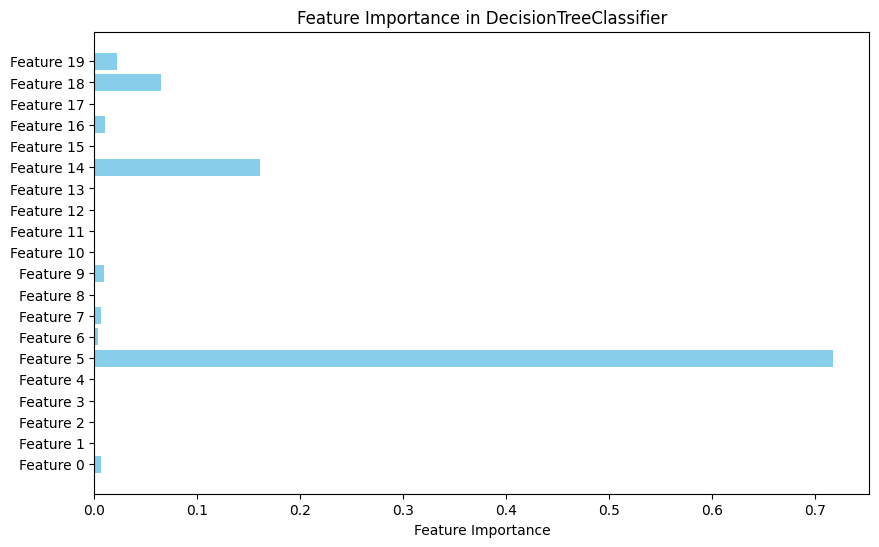

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Extract rules
rules = export_text(tree_clf, feature_names=[f'Feature {i}' for i in range(X.shape[1])])

# Print results
print(f"DecisionTreeClassifier Accuracy: {accuracy:.4f}")
print("\nRules Extracted from Decision Tree:")
print(rules)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh([f'Feature {i}' for i in range(X.shape[1])], tree_clf.feature_importances_, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in DecisionTreeClassifier')
plt.show()

### **基于规则的模型扩展**

如果需要更高级的规则模型，可以使用以下库：

#### **1. imodels**
`imodels` 是一个专注于解释性模型的库，支持规则生成。
- **安装**：
  ```bash
  pip install imodels
  ```




In [2]:
from imodels import RuleFitClassifier
rule_clf = RuleFitClassifier()
rule_clf.fit(X_train, y_train)
y_pred = rule_clf.predict(X_test)
print(f"RuleFitClassifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")

RuleFitClassifier Accuracy: 0.8700


#### **2. sklearn-rules**
`sklearn-rules` 提供基于规则的扩展支持（如基于 RIPPER 算法的规则生成）。
- **安装**：
  ```bash
  pip install skope-rules
  ```

In [4]:
# from skrules import SkopeRules
# rule_model = SkopeRules(max_depth=5, n_estimators=10)
# rule_model.fit(X_train, y_train)
# y_pred = rule_model.predict(X_test)
# print(f"SkopeRules Accuracy: {accuracy_score(y_test, y_pred):.4f}")

### **模型特点、适用场景及优缺点**

#### **1. 决策树模型**
- **特点**：
  - 通过树状规则划分数据空间。
  - 规则透明、易于解释。
- **适用场景**：
  - 小规模数据集，特征之间有明确边界。
- **优点**：
  - 易于实现，结果解释性强。
  - 可扩展为集成模型（如随机森林）。
- **缺点**：
  - 对噪声数据敏感，容易过拟合。

#### **2. RuleFit**
- **特点**：
  - 从线性模型和决策树中提取规则，形成规则集。
- **适用场景**：
  - 需要更细粒度规则的分类任务。
- **优点**：
  - 规则解释性好。
  - 可生成更少但更有意义的规则。
- **缺点**：
  - 对高维数据的扩展能力有限。

#### **3. SkopeRules**
- **特点**：
  - 使用随机森林提取规则，并通过交叉验证筛选最佳规则。
- **适用场景**：
  - 需要从复杂数据中提取规则。
- **优点**：
  - 可处理更复杂的数据模式。
- **缺点**：
  - 模型复杂，计算成本较高。

---

### **选型建议**

1. **小规模数据集**：使用 `DecisionTreeClassifier`，简单高效。
2. **需要更高解释性**：使用 `imodels` 提供的 `RuleFitClassifier`。
3. **复杂任务或规则提取**：使用 `sklearn-rules` 提供的 `SkopeRules`。